# MI 2 SoSe22: Exercise sheet 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os
home = os.getcwd()

## Exercise H6.1: Kurtosis of Toy Data

We begin by loading the dataset

In [2]:
# all data will be saved in this dictionary
distributions_data = loadmat("distrib.mat")
# names of the three distributions
distributions = list(distributions_data.keys())[-3:]

for distri in distributions:
    distributions_data[distri] = {f'original': distributions_data[distri]}
    
print(distributions)

['normal', 'laplacian', 'uniform']


##### a)

Mixing matrix

In [3]:
A = np.array([[4, 3],[2, 1]])

for distri in distributions:
    s = distributions_data[distri]['original']
    x = A.dot(s)
    distributions_data[distri]["mixed"] = x

##### b)

Centering data

In [4]:
def center(x):
    return x - np.expand_dims(np.mean(x, 1), 1)

In [5]:
for distri in distributions:
    distributions_data[distri]["centered"] = center(distributions_data[distri]['mixed'])
    print(np.mean(distributions_data[distri]["centered"], 1))

[ 1.33297817e-15 -3.71755959e-15]
[ 3.40776296e-15 -4.00746103e-16]
[-4.49063009e-16 -3.48165941e-16]


#### c) and d)

Whitening

In [6]:
def whitening(x):
    
    # covariance and eigendecomposition
    covariance = np.cov(x)
    eig_value, eig_vector = np.linalg.eig(covariance)
    # bring eigenvalues into a diagonal matrix
    eig_value_matrix = np.diag(eig_value)
    # whitening transformation
    whitening = np.linalg.inv(np.sqrt(eig_value_matrix)).dot(eig_vector.T)
    # whiten data
    x_whitened = whitening.dot(x)

    return x_whitened

In [7]:
for distri in distributions:
    distributions_data[distri]["whitened"] = whitening(distributions_data[distri]['centered'])
    print(distri + ":\n", np.round(np.cov(distributions_data[distri]["whitened"]), 4))

normal:
 [[ 1. -0.]
 [-0.  1.]]
laplacian:
 [[ 1. -0.]
 [-0.  1.]]
uniform:
 [[ 1. -0.]
 [-0.  1.]]


#### e) and f)

Rotating and find the minimum and maximum of Kurtosis

In [8]:
def rotation(angle):
    # 2d rotation matrix from angle
    R = np.array(
        [[np.cos(angle), - np.sin(angle)],
         [np.sin(angle), np.cos(angle)]])
    return R

def kurt(x):
    # empirical kurtosis
    return np.mean(x**4, 1) - 3

In [9]:
angles = np.pi/50*np.linspace(0, 101)

for distri in distributions:
    
    x_whit = distributions_data[distri]["whitened"]
    # rotate data and calculate kurtosis
    kurtosis = np.array([kurt(rotation(angle).dot(x_whit)) for angle in angles])
    # find angle that maximizes and minimizes kurtosis
    max_angle = angles[np.argmax(kurtosis, 0)[0]]
    min_angle = angles[np.argmin(kurtosis, 0)[0]]
    print(kurt(rotation(max_angle).dot(x_whit))[0], kurt(rotation(min_angle).dot(x_whit))[0])
    # store rotated data with those angles
    distributions_data[distri]["rotated_max"] =  rotation(max_angle).dot(x_whit)
    distributions_data[distri]["rotated_min"] =  rotation(min_angle).dot(x_whit)

0.0015307950233993672 -0.07266289660909342
3.007727039633987 1.5874667192755778
-0.5836315854706848 -1.212600152033911


Plot

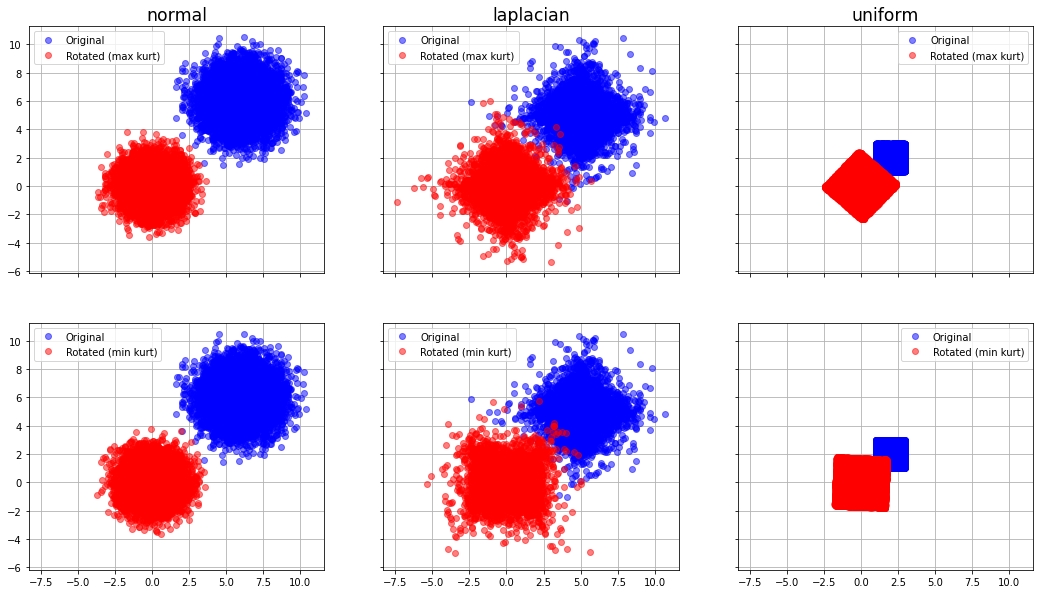

In [34]:
fig, axes = plt.subplots(2, 3, sharex = True, sharey = True, figsize = (18, 10))

for j in range(3):
    distri = distributions[j]
    s = distributions_data[distri]["original"]
    axes[0][j].set_title(distri, size = 'xx-large')
    
    for (i, rot) in enumerate(["max", "min"]):
        r = distributions_data[distri]["rotated_" + rot]

        ax = axes[i][j]
        ax.plot(s[0], s[1], 'bo', label = "Original", alpha = 0.5)
        ax.plot(r[0], r[1], 'ro', label = f"Rotated ({rot} kurt)", alpha = 0.5)
        
        ax.legend()
        ax.grid()
    
plt.show()